# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 2000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = r'C:\Users\Arianna\Documents\2_HPC\NAML\Labs\LAB01 - SVD and PCA\data\ovariancancer_obs.csv'
#each row contains a patient
#each coloumn a gene of that patient
ovariancancer_grp_path = r'C:\Users\Arianna\Documents\2_HPC\NAML\Labs\LAB01 - SVD and PCA\data\ovariancancer_grp.csv'
#contains labels: 1 has cancer, 0 no

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()  
#generates a matrix from the data in the file
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != ''] #remove empty entreces

False


How many patients? How many features?

In [11]:
n_features=A.shape[0] #coloumns
n_patients=A.shape[1] #rows
print('%d features' %n_features)
print('%d patients' %n_patients)

4000 features
216 patients


How many patiens with and without cancer are there in the dataset?

In [12]:
n_cancer=np.sum(grp=='Cancer')
#len(grp(grp=='Cancer'))
n_noCanc=n_patients-n_cancer
print(n_cancer,n_noCanc)

121 95


Choose two proteins (between 1 and 2000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

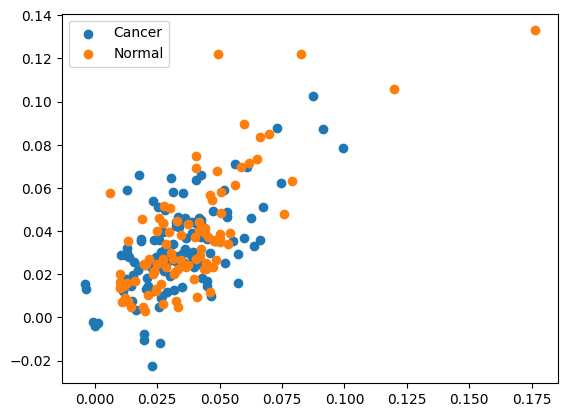

In [3]:
feature1 = 0
feature2 = 1

plt.scatter(A[feature1, grp == 'Cancer'],A[feature2, grp == 'Cancer'],label = 'Cancer')
plt.scatter(A[feature1, grp == 'Normal'],A[feature2, grp == 'Normal'], label = 'Normal')
plt.legend()

Repeat the previous point, this time by considering three proteins.

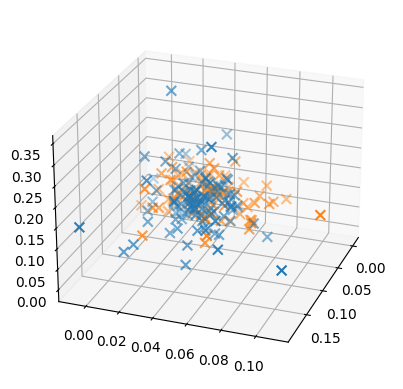

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

feature1=1000
feature2=2000
feature3=3000

ax.scatter(A[feature1, grp == 'Cancer'], A[feature2, grp == 'Cancer'], A[feature3, grp == 'Cancer'], marker='x', s=50)
ax.scatter(A[feature1, grp == 'Normal'], A[feature2, grp == 'Normal'], A[feature3, grp == 'Normal'], marker='x', s=50)

ax.view_init(25,20)

We need to reduce the dimensionality of the data to visualize it better --> we do it with PCA

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [6]:
A_mean=np.mean(A,axis=1) #mean on direction 1 
U,s,Vt=np.linalg.svd(A-A_mean[:,np.newaxis],full_matrices=False)

Text(0.5, 1.0, 'explained variance')

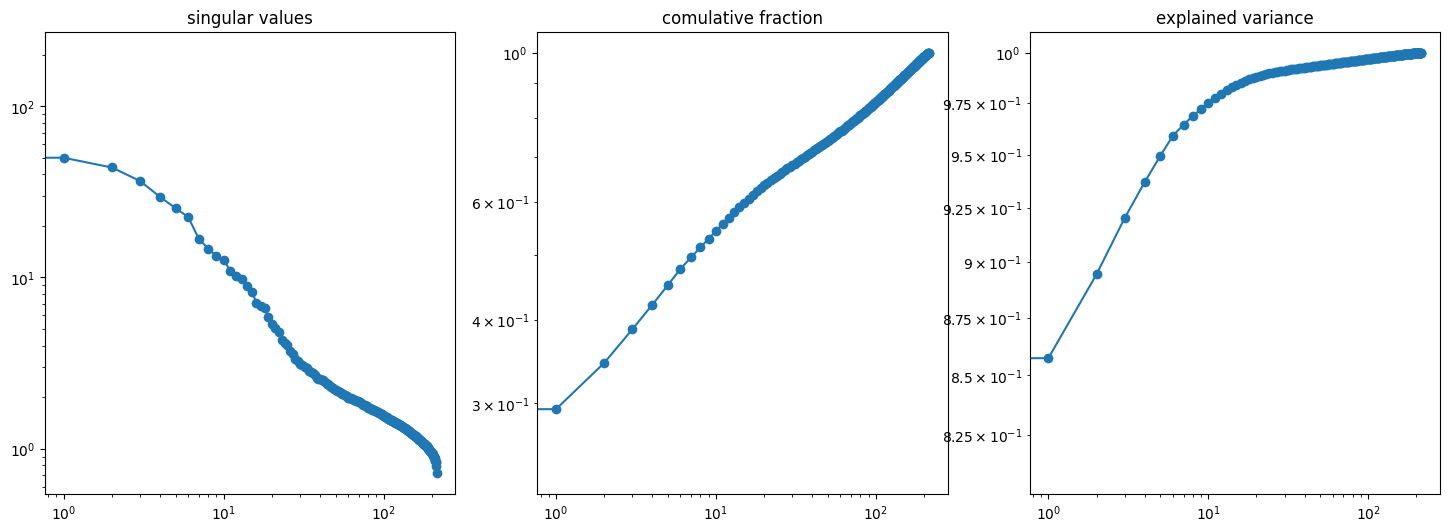

In [9]:
fig, axs =plt.subplots(1,3, figsize=(18,6))

axs[0].loglog(s[:-1], 'o-') #tolgo ultimo ele perché è quasi 0
axs[0].set_title('singular values')

axs[1].loglog(np.cumsum(s)/np.sum(s), 'o-')
axs[1].set_title('comulative fraction')

axs[2].loglog(np.cumsum(s**2)/np.sum(s**2), 'o-')
axs[2].set_title('explained variance') 
#with 1 principal component we can explain 85% of variability

Make a scatterplot of the first two principal components of the patients.

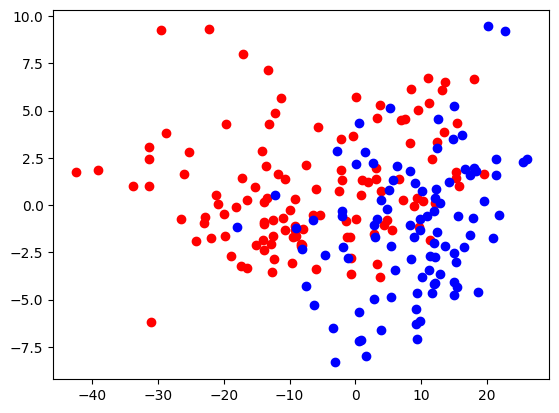

In [13]:
for i in range(n_patients) : 
    if grp[i] == 'Cancer':
        color='r'
    else:
        color='b'
    plt.scatter(np.inner(U[:,0], A[:,i]- A_mean),
                np.inner(U[:,1], A[:,i]- A_mean),color=color)

Make a scatterplot of the first three principal components of the patients.

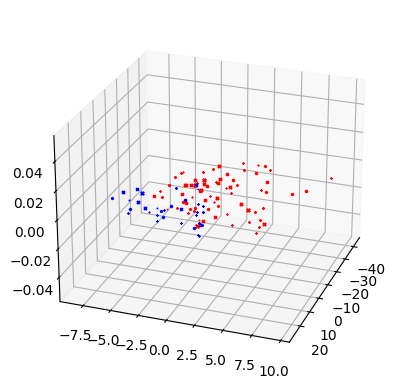

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_patients) : 
    if grp[i] == 'Cancer':
        color='r'
    else:
        color='b'
    plt.scatter(np.inner(U[:,0], A[:,i]- A_mean),
                np.inner(U[:,1], A[:,i]- A_mean),
                np.inner(U[:,2], A[:,i]- A_mean),color=color, marker='x')
    
    ax.view_init(25,20)